# TF-IDF

## OBTENCIÓN DE TODOS LOS TERMINOS
Leemos el archivo llamado DocumentoPreprocesado.txt para poder obtener todos los terminos del documento (sin repetirlos)

In [1]:
terminos=[]
tabla=[]
with open("Tweets.txt",encoding="utf8") as file1:#LEECTURA DEL DOCUMENTOS PARA LA OBTENCION DE TERMINOS  
    for linea in file1:
        words = linea.split() 
        for word in words:
            terminos.append(word)                               #AGREGAMOS LA PALABRA A LA LISTA TERMINOS 
    terminos = list(set(terminos))                              #PARA QUITAR LOS TERMINOS REPETIDOS DE LA LISTA
file1.close()

#### IMPRIMIMOS LOS TERMINOS

In [2]:
import pandas as pd
pd.DataFrame(terminos)

,0
0,madre
1,comiencen
2,xD
3,http://t.co/gkAWMVtRak
4,deja?
...,...
2249,baúl
2250,@endeavorags
2251,campeonato.
2252,amor


## FRECUENCIA 

In [3]:
documentos = []
with open("Tweets.txt",encoding="utf8") as file1:  
    for linea in file1:
        words = linea.split()                      #WORDS SON LAS PALABRAS DE NUESTRO DOCUMENTO/LINEA (LISTA)
        numDePalabras = dict.fromkeys(terminos, 0) #ASIGNAMOS 0 A LOS TERMINOS DE NUESTRO DICCIONARIO (NUMDEPALABRAS)
        for word in words:                         #POR CADA PALABRA DE NUESTRO DOCUMENTO
            numDePalabras[word] += 1               #CONTAMOS CUANTAS VECES SE ENCUENTRA ESA PALABRA EN EL DOCUMENTO Y ACTUALIZAMOS EL DICCIONARIO
        tabla.append(numDePalabras)                #NUESTRA TABLA ES UNA LISTA DE DICCIONARIOS (1 DICCIONARIO POR CADA DOCUMENTO)
        documentos.append(words)
file1.close()


#### IMPRIMIMOS LA TABLA DE FRECUENCIA

In [4]:
import pandas as pd
df_rrss=pd.DataFrame(tabla)    #SE CREA UN DATAFRAME DE LA TABLA CREADO ANTERIORMENTE
df_rrss1 = df_rrss.transpose() #SE CAMBIAN LAS FILAS POR LAS COLUMNAS Y LAS COLUMNAS POR FILAS
df_rrss1.to_excel('tabla.xlsx')#SE CREA UN ARCHIVO DE EXCEL UNICAMENTE PARA VER QUE LOS VALORES SE GUARDARAN CORRECTAMENTE
pd.DataFrame(df_rrss1)         #IMPRIMIMOS EL DATA FRAME

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
madre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
comiencen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
xD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://t.co/gkAWMVtRak,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
deja?,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
baúl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@endeavorags,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
campeonato.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
amor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF (FRECUENCIA DE TERMINOS)
Se asume que los términos de alta frecuencia son
importantes para describir los tópicos clave de un
documento, con la siguiente
𝑡𝑓𝑖,𝑗=𝑓𝑖,𝑗

Una variante del peso TF es:
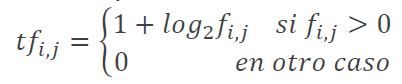

#### FUNCIÓN TF
Se le pasa el documento (diccionario) de la tabla 𝑓𝑖,𝑗 para la creación de la tabla 𝑡𝑓𝑖,𝑗

In [5]:
import math
def TF(documento):                              #RECIBIMOS UN DICCIONARIO QUE ES NUESTRO DOCUMENTO CON LA FRECUENCIA
    tfDict = {}                                 #CREAMOS UN DICCIONARIO PARA TF
    for word, fij in documento.items():         #SE EMPIEZA CON LA LECTURA DE CADA PALABRA DEL DOCUMENTO Y OBTENEMOS SU FRECUENCIA
        if fij != 0:                           
            tfDict[word] = 1 + math.log2(fij)   #SI 𝑓𝑖,𝑗 > 0 SE REALIZA LA OPERACIÓN
        else:
            tfDict[word] = 0                    #EN OTRO CASO SE ASIGNA 0
    return tfDict                               #SE RETORNA UN NUEVO DICCIONARIO(TF)

#### CREACIÓN DE LA TABLA 𝑡𝑓𝑖,𝑗:

In [6]:
tf=[]                        #LISTA DE DICCIONARIOS DE TF
for documento in tabla:      #SE RECORREN LOS DICCIONARIOS DE LA LISTA TABLA
    tf.append(TF(documento)) #SE AGREGA A LA LISTA NUEVOS DICCIONARIOS CREADOS POR LA FUNCIÓN TF

#### IMPRIMIMOS LA TABLA DE TD

In [7]:
TF_DATAFRAME=pd.DataFrame(tf)    #SE CREA UN DATAFRAME DE LA TABLA TF CREADA ANTERIORMENTE
TF1 = TF_DATAFRAME.transpose()   #SE CAMBIAN LAS FILAS POR LAS COLUMNAS Y LAS COLUMNAS POR FILAS
TF1.to_excel('TF.xlsx')#SE CREA UN ARCHIVO DE EXCEL UNICAMENTE PARA VER QUE LOS VALORES SE GUARDARAN CORRECTAMENTE
pd.DataFrame(TF1)      #IMPRIMIMOS EL DATA FRAME

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
madre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comiencen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
http://t.co/gkAWMVtRak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
deja?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
baúl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
@endeavorags,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
campeonato.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
amor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## IDF (FRENCUENCIA INVERSA DEL DOCUMENTO)
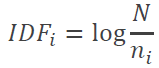
Dónde N es el número de documentos entre la frecuencia del termino

In [8]:
def IDF(documentos):                                #RECIBIMOS TODOS LOS DOCUMENTOS
    import math                                     #IMPORTAMOS MATH PARA PODER TRABAJAR CON LOG BASE 2
    idfDict = {}                                    #CREAMOS UN NUEVO DICCIONARIO PARA IDF
    N = len(documentos)                             #CON LEN OBTENEMOS LA CANTIDAD DE DOCUMENTOS Y SE ASIGNA A N
    idfDict = dict.fromkeys(documentos[0].keys(), 0)#ASIGNAMOS A LOS CONTENIDOS DE LOS DICCIONARIOS 0
    for doc in documentos:                          #VOLVEMOS A OBTENER LA FRENCUENCIA DE LOS TERMINOS PARA ESTE DICCIONARIO
        for word, ni in doc.items():
            if ni > 0:                              #SOLO AQUELLOS QUE SU VALOR SEA MAYOR A 0 PARA PODER REALIZAR LA DIVISIÓN
                idfDict[word] += 1
    
    for word, ni in idfDict.items():                #RECORREMOS EL DICCIONARIO CREADO ANTERIORMENTE
        idfDict[word] = math.log2(N / float(ni))    #ASIGNAMOS LA OPERACIÓN A LA PALABRA DEL DICCIONARIO IDFDICT 
    return idfDict                                  #RETORNAMOS EL DICCIONARIO

In [9]:
import pandas as pd
idfs = IDF(tabla)                                                                       #SE LLAMA A LA FUNCIÓN IDF,LE MANDAMOS TABLA (LA LISTA DE DICCIONARIOS) Y NOS RETORNA UN DICCIONARIO NUEVO
idfsTabla = idfs
df = pd.DataFrame([[key, idfsTabla[key]] for key in idfsTabla.keys()], columns=['Termino', 'IDF'])#SE IMPRIMRE EL DATAFRAME CREADO CON EL NUEVO DICCIONARIO CREADO POR LA FUNCION IDF
df

,Termino,IDF
0,madre,8.451211
1,comiencen,8.451211
2,xD,6.866249
3,http://t.co/gkAWMVtRak,8.451211
4,deja?,8.451211
...,...,...
2249,baúl,8.451211
2250,@endeavorags,8.451211
2251,campeonato.,8.451211
2252,amor,6.451211


## ESQUEMA TF/IDF PESADO
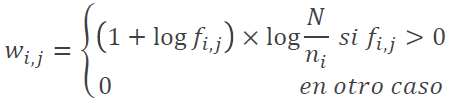

El esquema más popular de los esquemas de términos
pesados es usar una combinación de IDF con
frecuencia de términos

Sea 𝑤𝑖,𝑗el peso del término asociado con el par
𝑘𝑖,𝑑𝑗 el cual se define


In [10]:
def TFIDF(documentotf, idfs):                 #FUNCION TFIDF RECIBE TANTO LA LISTA TF COMO IDF
    tfidf = {}                                #CREAMOS DICCIONARIO TFIDF
    for word, valor in documentotf.items():   #CADA PALABRA DEL DOCUMENTO (TF)
        tfidf[word] = valor*idfs[word]        #EL VALOR DE LA PALABRA DEL DOCUMENTO SE MULTIPLICA POR EL VALOR DE LA FRECUENCIA INVERSA DE LA PALABRA 
    return tfidf                              #RETORNAMOS EL DICCIONARIO NUEVO 

In [11]:
tfidf=[]                                  #LISTA TFIDF PARA MOSTRAR NUESTRA TABLA 
for documentotf in tf:                    #VAMOS RECORRIENDO LA LISTA DE DICCIONARIOS (CADA DICCIONARIO ES UN DOCUMENTO)
    tfidf.append(TFIDF(documentotf, idfs))#AGREMOS EL DICCIONARIO RETORNADO A NUESTRA LISTA TFIDF

In [12]:
TFIDF_DATAFRAME=pd.DataFrame(tfidf)    #SE CREA UN DATAFRAME DE LA TABLA CREADO ANTERIORMENTE
TFIDF1 = TFIDF_DATAFRAME.transpose()   #SE CAMBIAN LAS FILAS POR LAS COLUMNAS Y LAS COLUMNAS POR FILAS
TFIDF1.to_excel('TFIDF.xlsx')#SE CREA UN ARCHIVO DE EXCEL UNICAMENTE PARA VER QUE LOS VALORES SE GUARDARAN CORRECTAMENTE
pd.DataFrame(TFIDF1)         #IMPRIMIMOS EL DATA FRAME

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
madre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
comiencen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
xD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
http://t.co/gkAWMVtRak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
deja?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
baúl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
@endeavorags,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
campeonato.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.451211,0.0,0.0,0.0
amor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## VECTORIZACIÓN

### NORMALIZACIÓN DE LA LONGITUD DE LOS DOCUMENTOS
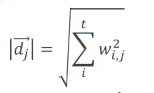

In [13]:
def normalizacion(documentos):              #RECIBE TODOS LOS DOCUMENTOS (TFIDF)
    tfidfN = {}                             #TFIDFN ES EL TFIDF NORMALIZADO (DICCIONARIO)
    i = 0                                   #CONTADOR I PARA NOMBRAR AL DOCUMENTO
    for dj in documentos:                   #SE RECORRE CADA UNO DE LOS DOCUMENTOS (DJ)
        sumatoria=0                         #INICIALIZAMOS LA SUMATORIA EN 0
        for word, valor in dj.items():      #TOMAMOS LOS VALORES DE CADA UNA DE LAS PALABRAS DEL DOCUMENTO LEIDO
            doc = 'd'+str(i)                #SE CREA UN STR QUE SERÁ LA CLAVE
            sumatoria+= valor**2            #OBTENEMOS EL VALOR DE LA SUMATORIA
        tfidfN[doc] =  math.sqrt(sumatoria) #LE SACAMOS RAIZ A LA SUMATORIA Y PONEMOS LA CLAVE Y SU VALOR
        i= i+1                              #SE INCREMENTA EL CONTADOR
    return tfidfN                           #RETORNAMOS TFIDF NORMALIZADO

In [14]:
def normalizacionQ(query):                  #RECIBE EL QUERY (TFIDF)
    sumatoria=0                             #INICIALIZAMOS LA SUMATORIA EN 0
    for word, valor in query.items():       #TOMAMOS LOS VALORES DE CADA UNA DE LAS PALABRAS DEL DOCUMENTO LEIDO
        sumatoria+= valor**2                #OBTENEMOS EL VALOR DE LA SUMATORIA
    tfidfNQ =  math.sqrt(sumatoria)         #LE SACAMOS RAIZ A LA SUMATORIA Y PONEMOS LA CLAVE Y SU VALOR
    return tfidfNQ   

In [15]:
tfidf_normalizado = normalizacion(tfidf)    #LLAMAMOS A NORMALIZADO, LE PASAMOS TFIDF Y NOS RETORNA EL VALOR DE LOS DOCUMENTOS NORMALIZADOS
df = pd.DataFrame([[key, tfidf_normalizado[key]] for key in tfidf_normalizado.keys()], columns=['Documento(dj)', 'Normalización'])#SE IMPRIMRE EL DATAFRAME CREADO CON EL NUEVO DICCIONARIO CREADO POR LA FUNCION IDF
df

,Documento(dj),Normalización
0,d0,22.883979
1,d1,23.228838
2,d2,17.069120
3,d3,17.897138
4,d4,21.829228
...,...,...
345,d345,31.835105
346,d346,30.441545
347,d347,22.138305
348,d348,20.966065


### MODELO ESPACIO VECTORIAL
La representación del documento dj y la consulta q son vectores t-dimensionales dados por:
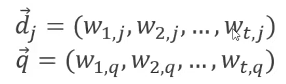

### CONSULTA 

#### PREPROCESAMIENTO DE LA CONSULTA

In [16]:
def elimina_tildes(busqueda):
    s = ''.join((c for c in unicodedata.normalize('NFD',busqueda) if unicodedata.category(c) != 'Mn'))
    return s

In [17]:
stop_words_sp_en = set()
import io  
import unicodedata #PARA LA FUNCION DE ELIMINAR TILDES
import spacy #PARA LA FUNCION DE LEMATIZACION
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
stop_words = set(stopwords.words('Spanish')) 
#LE QUITAMOS LAS TILDES DEBIDO A QUE AL BUSCAR LE HABREMOS QUITADOS LAS TILDES A NUESTROS DOCUMENTOS
for palabra in stop_words:
    palabrasinT=elimina_tildes(palabra)
    stop_words_sp_en.add(palabrasinT)
#MEZCLAMOS LAS STOPWORDS EN INGLES Y ESPAÑOL
stop_words_sp_en.update(set(stopwords.words('English'))) 

In [18]:
def lematizacion(busqueda):
    sp = spacy.load('es_core_news_sm')#LEMATIZA EN ESPAÑOL (SE DESCARGÓ LIBRERY)
    #sp = spacy.load('en_core_web_sm')
    consulta = ''
    query=sp(busqueda)
    for words in query:
        consulta = consulta + words.lemma_ + " "
    return consulta

In [19]:
def elimina_PV(busqueda):
    palabra_sinPV=''
    words = busqueda.split() 
    for word in words:
        if not word in stop_words_sp_en:
            palabra_sinPV = palabra_sinPV+word+" "
    return palabra_sinPV

In [20]:
def preprocesamiento_Consulta(busqueda):
    #query= lematizacion(elimina_PV(elimina_tildes(busqueda).lower()))
    query= elimina_PV(elimina_tildes(lematizacion(busqueda).lower()))
    return query

#### TFIDF EN LA CONSULTA

In [21]:
tfidfQuery = {}
def TFIDF_QUERY(query):
    #=====================================SE OBTIENE LA FRECUENCIA===================================================
    wordsQuery = query.split()                      #WORDS SON LAS PALABRAS DE NUESTRO DOCUMENTO/LINEA (LISTA)
    numDePalabrasQuery = dict.fromkeys(terminos, 0) #ASIGNAMOS 0 A LOS TERMINOS DE NUESTRO DICCIONARIO (NUMDEPALABRAS)
    for word in wordsQuery:                         #POR CADA PALABRA DE NUESTRO DOCUMENTO
        if word in terminos:
            numDePalabrasQuery[word] += 1           #CONTAMOS CUANTAS VECES SE ENCUENTRA ESA PALABRA EN EL DOCUMENTO Y ACTUALIZAMOS EL DICCIONARIO
    
    ##=====================================         TF           ===================================================
    tfQ=TF(numDePalabrasQuery) #UTILIZAMOS LA FUNCION TF Y MANDAMOS EL DICCIONARIO QUE CONTIENEN LA FRECUENCA DEL QUERY
                               #NOS RETORNA UN DICCIONARIO Y LO ALMACENAMOS EN TFQ
    
    ###=====================================        IDF          ====================================================
    #YA CONTAMOS CON NUESTRO IDF
    
    ###=====================================       TF IDF        ===================================================
    tfidfQuery = TFIDF(tfQ, idfs) #HACEMOS USO DE LA FUNCIÓN TFIDF Y LE PASAMOS NUESTRO EL TF Y EL IDFS
    return tfidfQuery

#Frases de prueba

juegos del hambre
partido aburrido
un novio divertido
venta de vestidos largos
mejores canciones de juan gabriel

### EVALACIÓN DEL GRADO DE SEMEJANZA ENTRE EL DOCUMENTO Y LA CONSULTA
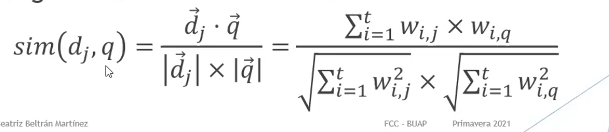

In [22]:
import numpy as np
def sim(tfidf,q):
    sim = {}
    i = 0
    vq=[]
    for word, valor in q.items():  
        vq.append(valor)
    for documento in tfidf:
        vd=[]
        for word, dj in documento.items():  
            vd.append(dj)
        doc = "d"+str(i)
        productopunto = np.dot(vq,vd)
        MQ =np.array(vq)
        MD =np.array(vd) 
        magnitud = np.linalg.norm(MQ)*np.linalg.norm(MD)
        sim[doc]= productopunto/magnitud
        i=i+1
    return sim
    

In [23]:
def obtenerMejores(resultados):
    for i in range(5):
        if i == 0:
            max_key = max(resultados, key=lambda key: resultados[key])
            print("Documentos mas relevante",max_key," y el peso es: ",resultados[max_key])
            resultados.pop(max_key)
        else:
            max_key = max(resultados, key=lambda key: resultados[key])
            print("Documentos medianamente relevantes",max_key," y el peso es: ",resultados[max_key])
            resultados.pop(max_key)

### CONSULTA AL USUARIO

In [24]:
while(True):
    Query=''
    print("==============================================================================================")
    print("Realiza tu consulta Consulta")
    lectura = input()
    Query = preprocesamiento_Consulta(lectura)
    tfidfQ=TFIDF_QUERY(Query)
    obtenerMejores(sim(tfidf,tfidfQ))
    print("==============================================================================================")
    print("¿Deseas hacer otra consulta?")
    respuesta = input()
    if respuesta == 'no':
        print("==============================================================================================")
        print("Gracias por tu consulta")
        print("==============================================================================================")
        break

Realiza tu consulta Consulta
juegos del hambre
Documentos mas relevante d7  y el peso es:  0.24317070330245802
Documentos medianamente relevantes d20  y el peso es:  0.23820184215983614
Documentos medianamente relevantes d349  y el peso es:  0.2246950607694216
Documentos medianamente relevantes d0  y el peso es:  0.0
Documentos medianamente relevantes d1  y el peso es:  0.0
¿Deseas hacer otra consulta?
no
Gracias por tu consulta


$user tweeted im villa india aguascalientes mexico 
$user tweeted fin okhand $user $user $user $user 
$user tweeted $user jajaja veeeeen 
$user tweeted domingo comer solo 
$user tweeted mejor pareja mundo & lt3 
$user tweeted rt $user invito seguir carnal $user cantante $user arriba durango cabrones waterpistol waterpistol waterpistol waterpistol waterpistol 
$user tweeted $user uu jajajajjajajajajaigual 
$user tweeted rt $user reanudar juego 2 entrada $ht matehuala $user 0 $user 0 $ht vamosatrascender 
$user tweeted decir alma corazon abierto 
$user tweeted $user aqui mori mori dia ir 
$user tweeted $user risa 
$user tweeted invito seguir carnal $user cantante $user arriba durango cabrones waterpistol waterpistol waterpistol waterpistol waterpistol 
$user tweeted $user entender jaja 
$user tweeted parecer faltar atencion mantenimiento museo ciudad parte $user 
$user tweeted ahora entender juntar necesidad hambre gente acomplejado 
$user tweeted descontrolar 
$user tweeted junto lugar perfectollamado cama 
$user tweeted $user apollarte aqui saludo aguascalient mexico 
$user tweeted asi deber ser $user $ht kca $ht votepaty 
$user tweeted rt $user tal vez esperar nunca ir suceder 
$user tweeted reanudar juego 2 entrada $ht matehuala $user 0 $user 0 $ht vamosatrascender 
$user tweeted vida prometer 
$user tweeted $user entonces ser cierto gusto ver ayer 
$user tweeted $user ps ver amor 
$user tweeted senor policia noooo juro ser joto nomas gustar tener pirrin 
$user tweeted trabajo ver $ht seriedemods senor $ht alexelcalvo $user $ht likeaboss 
$user tweeted $user ps dejate venir awuitar 
$user tweeted mitad quincena comiencir juego hambre 
$user tweeted $user pues ver amor 
$user tweeted mesolifting rejuvenecimiento faciala traves aplicacion microinyeccion piel 
$user tweeted rt $user $user $user llamar nina rejoneadorar ser paty gomez 
$user tweeted $user pasar amigo erar 3 
$user tweeted ser mejor bby agasajar casi pendejada querer & lt3 
$user tweeted perdonar tardanza enamorado 
$user tweeted rt $user $ht super $ht guapisir $ht aguascalientes $ht nizar $ht amigos $ht porqueloshombresamanalascabronas $ht aracelyarambula 
$user tweeted damaris ayar caso pendeja ask ser guapisimo dejarla tardar querer 
$user tweeted rt $user gracias diosito hacer igualito pena nieto 
$user tweeted rt $user $user acuerdo ser parte circo parecer quitar privilegio millon 
$user tweeted noche citar $ht jet $ht guapisir $ht aguascalientes $ht antro 
$user tweeted $user caen 330 accion televisa bmv perder 7 mil mdp $ht placer $ht placer $ht placer 
$user tweeted gracias diosito hacer igualito pena nieto 
$user tweeted regularizamos vehiculo dejar atras adeudos largas filas perdida tiempo estrena placas nuevas tan 
$user tweeted encantar novio ser hacer morir risa 
$user tweeted lindo bolsa forma animalito nina encantarar 
$user tweeted $user hola terricola alien dinosaurio 
$user tweeted frase odiota prometer caballero sorprender 
$user tweeted correr ovalo ir correr nitro ensuceir pista modo 
$user tweeted rt $user aficion mexicana merecer jose tomas reaparecer plaza mayor aforo tener mayor posibilidad 
$user tweeted $user jejeje 
$user tweeted mejor tener novio super divertido lugar limitarte seguir pedo 
$user tweeted aficion mexicana merecer jose tomas reaparecer plaza mayor aforo tener mayor posibilidad asistir 
$user tweeted $user motivado hos va tienda gustariar 
$user tweeted x keeeeerer hombre andar tantear uyuyuiiii k miedo jajajajjajajaj 
$user tweeted $user solo hoy compra 
$user tweeted rt $user $ht cartadedespedida vamos 9mil views ayudeno compartirlo 
$user tweeted desgastir provee situacion unico querer ser desaparecer dejar pensar sentir 
$user tweeted quiero amor estilo iron man 
$user tweeted x meter hombre andar tantear huiyuyiuuuiiii k miedoso jajajajajajaja 
$user tweeted buen toquin ayer 
$user tweeted rt $user recuerdas pasar recuerda convertir pasar 
$user tweeted recalentado 
$user tweeted paco chavez ser coordinador regional espacio comun aguascalientes llevar importante avance 
$user tweeted ayer ser dia divertido vida bebe llevar lugar super bonito 
$user tweeted $user presidente siempre querer preguntar alguno vez estudiar acerca escuela austriaca economia 
$user tweeted rt $user 30s ser nuevo 20s 
$user tweeted momento ver campeon $user pase pasar amar $ht ydaleu $ht garracrema 
$user tweeted menos haber dejar santiago banos dt lugar pinche antonio mohamed ratonero confirmista 
$user tweeted $user gracias igualmente 
$user tweeted pura candela 
$user tweeted $user tortilla 
$user tweeted jorge serna guli mejor ags 
$user tweeted jorge serna guli mejor ags 
$user tweeted $user $user llamar nina rejoneadorar ser paty gomez 
$user tweeted $user claro yazmin negra prieta 
$user tweeted $user siii ahi mandar whats 
$user tweeted ahora quede bien almohada $ht sasha dogface converti vickyhdd 
$user tweeted $user querer verte 
$user tweeted rt $user gobierno municipal convertir modulo seguridad abandonado centro cultural 
$user tweeted $user dema cuanto 800 seguramente acomodado 
$user tweeted jaaaa pa l facir 
$user tweeted $user 10 casa amor 
$user tweeted recuerdas pasar recuerda convertir pasar 
$user tweeted invitar copa acerco boca ♫ 
$user tweeted $user loudlycryingface poner frase foto ser tonta puerta loudlycryingface 
$user tweeted tres dia pase bien querer volver ah casa ajajajjaja 
$user tweeted rt $user $ht seguidores muchas gracias $ht follow checkmark sigo 
$user tweeted odio futbol americano siempre hacer 
$user tweeted $user $user creser llegar primero victoria temporada 
$user tweeted $user dudar tantito amigo ir lleno ganadero amigo ganadero prensa etc 
$user tweeted $user ver cunado ahi ver 
$user tweeted rt $user chavalin suerte ahora haber pretexto nuevo espada disfrutalo $user 
$user tweeted $user winkingface smilingfacewithhearteyes smilingfacewithhearteyes smilingfacewithhearteyes ver hacer beamingfacewithsmilingeyes 
$user tweeted rt $user ximena esconderas mente creer vo santa foldedhands 
$user tweeted $user vas ir novillado 
$user tweeted $user jajjo 
$user tweeted sub 15 varonil medir ags zacatecas 
$user tweeted dejar orgullo amar 
$user tweeted pasar semana cafe extrano $user 
$user tweeted zuriel canta horrible microphone 
$user tweeted $user vos lado zulma jajajajaja 
$user tweeted capitan armando barrera tener actuacion 18 puntuacion 
$user tweeted $user amor ver brazo dormirno rato 
$user tweeted rt $user perder estilo $ht nisoytanmachoalpha 
$user tweeted $user feo extranar 
$user tweeted rt $user gobierno municipal convertir modulo seguridad abandonado centro cultural 
$user tweeted okhand $user alitas 
$user tweeted $user segun aca experto deber tomar limon ser 100 agave jejar ser tequila jejar 
$user tweeted clasica escenar rebote 
$user tweeted rt $user hoy $ht tardedetoros san marcos 
$user tweeted hola feliz domingo tener tod@s hoy presentar capa poncho poder usar temporada frio 
$user tweeted encontrar libro imagen erotico religioso tio sacerdote 
$user tweeted vendo puerta hierro forja 150 ancho 220 alto dos hojas $ht ibazar via $user 
$user tweeted $user pecho frio aguantir cba jajajajajjaja 
$user tweeted vez pretender ignorar alguien ser detestable ser imposible ignorar 
$user tweeted acabo publicar foto 
$user tweeted $user pos extrano 
$user tweeted senora mama boyos mundo cuervo squintingfacewithtongue $user $ht tequila $ht jalisco 
$user tweeted ahogado tarea 
$user tweeted $user feeeeeeeeaaaa kiero 
$user tweeted madre ayer baile baile enla trakalos aqi olvidado comer taco zanahoria 
$user tweeted despu via $user 
$user tweeted video juan crlos hernandez duron via $user 
$user tweeted dos nacer amor via $user 
$user tweeted carlos cepeda atacar salida poste aguascalentense 
$user tweeted $user cartel feliz dar muerto 
$user tweeted rt $user foto presentacion picnic cultural creado injuva 
$user tweeted rt $user hoy $ht tardedetoros san marcos 
$user tweeted new season ser tanfandolo regalar ver glee 
$user tweeted 3 semana carrera color ver pegar 45 
$user tweeted chingao hoy ir poder ir novillado esperar ser gran festejo cada domingo dios reparta suerte 
$user tweeted gobierno municipal convertir modulo seguridad abandonado centro cultural 
$user tweeted buen semana recuperacion trote 6 km ritmo abuelita cerrar eliminar vinote ayer 
$user tweeted rt $user $user ser 
$user tweeted $user solo alguien gusto decir sergej ser mejor cantante balcanes 
$user tweeted diente perfecto celebridad ser fakes $user 
$user tweeted ojala llueir hora eda ir mojar cunao 
$user tweeted $user solamente usar paint quejeis xddd 
$user tweeted rt $user presentar cerdito ahorro ser divertido poner moneda cada domingo 
$user tweeted pinche iphonir cagar vez meter 6570 rola putos actualizacion chakas deber ser 
$user tweeted cronica triunfo torero talavante hoy olivenza enhorabuena 
$user tweeted escribir quedar bien escribir guste tener precio reconocer dentro 
$user tweeted $user coincidencia caso smirkingface redheart 
$user tweeted chambear show center 
$user tweeted $user jajajaja loco 
$user tweeted rt $user atencion $ht aguasaclient perrita acabar rescatar zona sur puppyland ags hacer favor htt 
$user tweeted rt $user olvidar interrumpas ee 
$user tweeted molesta ausencia piel piel 
$user tweeted aprendi hacer malabar fuego disturbio voz 
$user tweeted registro sismico territorio estatal regional tener mayor precision proximo estacion $user@unammx 
$user tweeted rt $user enhorabuena excelente inicio temporada $user $user fuerte abrazo aguascalientes 
$user tweeted semestre administracion publico ensenar hacer tamales 
$user tweeted vodafone ono ono decidir jueves oferta vodafone salida bolsa 
$user tweeted ser adio siplemente luego dejar dios junto destino hacer tener hacer 
$user tweeted $user ser medio 170 traer tacon 15 
$user tweeted estupido whatsapp jala quierar 
$user tweeted soldc juventus derrotar fiorentina aumentar ventaja cima calcio juventus aumentar transitoriame 
$user tweeted dia 
$user tweeted $user q hermoso foto 
$user tweeted buen partido brindar ags zacatecas varonil sub 15 
$user tweeted $user love & lt3 siempre kntigo felicidadess 
$user tweeted rt $user hoy aguascalientes ver detalle stand $ht sanmarcos2014 llenaer tendido $ht modataurin 4to 
$user tweeted rt $user $user haber mejor novia mundo $ht quetu 
$user tweeted paola fernanda murillo rangel alejandra scarlett rangel maldonado alo reyes 
$user tweeted tener kik 
$user tweeted acciones regional olimpiada nacional ags 
$user tweeted piensalo 
$user tweeted fuuiiii seguir ser amor vidaaa aunque maldigar haberme conocido8 
$user tweeted rt $user enhorabuena excelente inicio temporada $users $user fuerte abrazo aguascalientes 
$user tweeted publique nuevo foto facebook k 
$user tweeted vida haber cambiar completo 
$user tweeted $user vdd intento hare adema aun seguir tratamiento saber andir encontrar ser imposible 
$user tweeted acercar mejor feria mexico asi ser feria aguascalientes hombre aranar listo lol  lol 
$user tweeted $user sabes hermosa decir ser mejor idola mundo orgullosamente fan apoyarte defenderte 
$user tweeted wuuuuu ganar gracias nina 1er lugar 10 pts seguir primero campeonato lol jejeje 
$user tweeted $user hermosa ser mejor idola mundo mundial jeje ser orgullo decir elegantishimo sonrisa je 
$user tweeted rt $user gusto recibir senador ismael hernandez deras aguascalientes bienvenido tierra gente buen 
$user tweeted rt $user $user jajajajar sii ♡ vos iguaaaal 
$user tweeted ir recordar viejo tiempo harvest moon ds $ht natsume$htharvestmoon 
$user tweeted ir extranar poder jurar 
$user tweeted domingo dedo 
$user tweeted antojar salads & amp grill 
$user tweeted $user jajajajar sii ♡ vos iguaaaal 
$user tweeted $user buenos dias jajajajaja mam burronio ser 2 tarde xd 
$user tweeted $user creer igual 1630 
$user tweeted $user $user jajaa llamar experto paint like boss xd 
$user tweeted rt $user besito amigas solteras $ht trompita casadas $ht cachetito kissmark 
$user tweeted amiga besar mujer sexi fin semana decir novio 
$user tweeted $user oir color crees quedar vestido largo graduacion 
$user tweeted rt $user hoy aguascalientes ver detalle stand $ht sanmarcos2014 llenaer tendido $ht modataurin 4to 
$user tweeted $user $user ching aqui mexico asi llamar tacho tachon taco etc ser campo ser sintetico natural 
$user tweeted $user haber mejor novia mundo $ht quetu 
$user tweeted $ht sos alguien saber poder conseguir gardenia ahora $ht agsmx 
$user tweeted baul recuerdo grinningfacewithbigeyes grinningfacewithbigeyes grinningfacewithbigeyes mceliapce 
$user tweeted domingo llover 
$user tweeted felicidades mujer hoy dia diariir ser dia solo 
$user tweeted $user jajjajajajajaj odio 
$user tweeted dejame 50 gusta doy 1 regalo cumplir 
$user tweeted $user crei ganaria juan gabriel 
$user tweeted $ht cartadedespedida vamos 9mil views ayudeno compartirlo 
$user tweeted ximena esconderas mente creer vo santa foldedhands 
$user tweeted hoy aguascalientes ver detalle stand $ht sanmarcos2014 llenaer tendido $ht modataurin 4to ano consecutivo 
$user tweeted hoy negar levantar cama 
$user tweeted poder hacer dia huir hoy 
$user tweeted rt $user dios quitar vida 
$user tweeted rt $user caballero hacer reir nina sonar princesa amar mujer 
$user tweeted noche vou casa melina punto digan decir 
$user tweeted pedo vida ser riesgo fergus 
$user tweeted rt $user hoy dia internacional mujer $user felicita 10 alumna maestria ciencias administracion $user 
$user tweeted rt $user $user $user $user $user sicierto querer chorro awo 
$user tweeted $user luego querer seguir enamorado ud subir foto fb $ht diosmio 
$user tweeted rt $user oigan $user $user mandar abrazo $user $user mando bare alabar ba 
$user tweeted apoco gay ser flaco buen onda ser pobre joto 
$user tweeted rt $user hoy dia internacional mujer felicitamos 21 alumna nivel maestria $user $user 
$user tweeted segundo vez semana leer hepatiti viral 
$user tweeted rt $user hoy dia internacional mujer felicitam 156 companeras laborar $user 
$user tweeted rt $user hoy dia internacional mujer felicitamos primera directora haber tener $user dora luz arriaga soto $user 
$user tweeted regresar uriel chavez alcaldia apatzingan comisionado federal michoacan alfr via $user 
$user tweeted hoy siempre azulcremo corazon ocasion orgulloso vestir defender color c & lt3 
$user tweeted querer vengas aca aguascalient saludos brittanny $user live 
$user tweeted pues duda $user cuarentena nunca saber cosa poder traer lar 
$user tweeted ir madero teresa jimenez esquivel 
$user tweeted rt $user $user preparandonos univercity $user 8 marzo complejo locomotora 
$user tweeted rt $user acabar ser game tener hablar ir shanghai 
$user tweeted rt $user $user listos p promover oferta educativo $user evento university 8 marzo complejo locomotora 
$user tweeted im rinconada bosques aguascalientes ags 
$user tweeted cabello loudlycryingface loudlycryingface loudlycryingface 
$user tweeted rt $user negar maluma ft jory original video music letra reg via $user $user 
$user tweeted publica vota gana asi facil 
$user tweeted acabar ser game tener hablar ir shanghai 
$user tweeted rt $user $user seguir instalandono expo universidad $user 
$user tweeted escuchar cancion senora 50 ano decir ser metallica verdad voz ser 
$user tweeted rt $user $user ser obligatorio evaluacion maestro poder otorgar plaza concurso 
$user tweeted negar maluma ft jory original video music letra reg via $user $user 
$user tweeted weba neta 
$user tweeted $user holaa nenar 
$user tweeted jajajajajjajajajajjajajajjajajjar 
$user tweeted hoy pizza hacer feliz carajo 
$user tweeted $user saludo valencia 
$user tweeted rt $user ultima horael $user contratar ninos triquis tomar rumbo equipo 
$user tweeted 
$user tweeted rt $user herencia educativo $user nexos via $user 
$user tweeted rt $user tener llegar punto dar igual l 
$user tweeted ir 
$user tweeted $user haber rollo soler pasar 
$user tweeted paulo martinez dirigencia panista 
$user tweeted vida kiero kn tigo 
$user tweeted tener llegar punto dar igual l 
$user tweeted $user linda tarde serio genial tener festejar dia especial 
$user tweeted $user q pues aguilucha q buena 
$user tweeted $ht amigo $ht contento $ht $ht consentido $ht lucrecia $ht actitudal100 $ht yehaa $user lucrecia 
$user tweeted hoy aun haber 
$user tweeted $user $user huir comentarista tendencioso $user juanillo vez dejar mejor poner mute jaja 
$user tweeted poder mirar ojo bonito smilingfacewithhearteyes 
$user tweeted $user $user $user $user sicierto querer chorro awo 
$user tweeted jajajajajja ay mms jajajajajjajaja 
$user tweeted aqui checar instalacion $ht laplazadelmariachi$htaguascalientes $user $user 
$user tweeted bien decir carga camara ser cielo ags espectacular 
$user tweeted rt $user ninguno mujer ser feo meapoema dedicado bello dama diagracia 
$user tweeted $ht amierdica xd 
$user tweeted jajajjajajajajajajjajacallate mirna callate jajajajja lol cagado jajajajajjar 
$user tweeted mejor calidad dvd blu ray puerta hogar comunicate compruebalo 
$user tweeted $user jaja 
$user tweeted rt $user gracias $user incluir planilla renovacion dirigencia nacional confiar mujer 
$user tweeted alguien saber comer $ht telegram 
$user tweeted bonito leon guanajuato 
$user tweeted siempre recordar tomser decision enojado hagar promesa feliz 
$user tweeted llegar friendzonir ups lastimar 
$user tweeted jajajajajajja 
$user tweeted querer lechera burro 
$user tweeted $user perdon ser guero real solucionar problema chivas neta perdon saludo 
$user tweeted rt $user oigan $user $user mandar abrazo $user $user mando bare alabar ba 
$user tweeted siento bien bonito asi redheart 
$user tweeted $user $user jaja preocupar gust mand 
$user tweeted esperar reaccion maquina 
$user tweeted partido pintar poner bueno 
$user tweeted llegamir casi copina 
$user tweeted $user tener facebook olvidar ser ruco bien chabelo 
$user tweeted $user alex olvidar dormir cenar xdd 
$user tweeted aca carlos paz 
$user tweeted ser & lt3#apobrarcosasbuenaspuesyaque nn#asdtfngba juju sentir decidido 
$user tweeted salidar comer familia 
$user tweeted cuidado desear jajajaj 
$user tweeted rt $user ultima horael $user contratar ninos triquis tomar rumbo equipo 
$user tweeted rt $user ultima horael $user contratar ninos triquis tomar rumbo equipo 
$user tweeted chivas bien pinch contento perder america recordar ayer perder chivas tener pendiente 
$user tweeted haber vez hacer cosa lindo simplemente dar cuenta tal v solo loco 
$user tweeted $user admito ser 5 saber diferencia ahi ay 
$user tweeted $user $user buen eleccion $ht vamosxmadero 
$user tweeted batman canal 5 seguramente 5 hora durar 
$user tweeted corona aparte ser gran portero ser gran cabezeador 
$user tweeted $user q q decir amar q c calmir tener desd q empezo trabajar n espn q admiro despu hizir twitter x ud 
$user tweeted esperar ansia partido resultado romper 
$user tweeted rt $user amor ver casa ver pelicula tener hueva comprar ropa tacon 
$user tweeted $user divino confio 
$user tweeted ahora seguir disfrutar sabadrinkis manana salir bye 
$user tweeted ser crudo ser reto bonafont 
$user tweeted $user jajajajajajaja ser mamon ser pinche ondo canijo 
$user tweeted ir bajar coraje 
$user tweeted rt $user dato papa gustar rio roma dato ser papa 
$user tweeted pues hablar chingar 
$user tweeted sabado haber hacer eternoooo 
$user tweeted $user $user dios carajo ps encantar articulo parachuting journalism 
$user tweeted oigan $user $user mandar abrazo $user $user mando bare alabar ba senor 
$user tweeted fin 700 pm acabar felicitar dia mujer empezar creer realidad ser hombre 
$user tweeted $user entonces ser amor primero llamar atencion ojos despues inteligencia final sonrisa ser cerrar trato 
$user tweeted dato papa gustar rio roma dato ser papa 
$user tweeted recuerden veces menos esperas cosa buena suceder 
$user tweeted rt $user ultima horael $user contratar ninos triquis tomar rumbo equipo 
$user tweeted chicas ir cerrar fb problema personal querer ser mos pinchar necesario perdonir 
$user tweeted pedo mamir $user 
$user tweeted seriar bueno perder cruz azul decir 
$user tweeted $user causa razon saludo 
$user tweeted $user golazo aventastir hoy ser grande peralta 
$user tweeted vamooooooos tigreeeeees hoy ganar u $ht somosincomparables $ht estoestigres $user 
$user tweeted $user llegador 
$user tweeted $user pasar dejar seen 
$user tweeted hola tal 3yo seguir jajajajo sigu espera jajajaj holayo seguiar 
$user tweeted cada vez razon apoyar $user $user $ht juntosvamosaganar $ht agsmx $ht pan 
$user tweeted mohammed creer ser problema pasar dentro equipo 
$user tweeted querer ver pensiveface pensiveface pensiveface 
$user tweeted rt $user ultima horael $user contratar ninos triquis tomar rumbo equipo 
$user tweeted $user dejar 
$user tweeted $user algun cel localizar foto herramientac 
$user tweeted holiiis lugar gustariar viajar color favorito holaitaliarojo azul negro gris verde seco 
$user tweeted carguero distancia veracruz 
$user tweeted rt $user mujer ser obra arte iluminar ojo mira feliz dia mujer $user heartsuit 
$user tweeted ver gana ganar falta confianza equipo 
$user tweeted rt $user ultima horael $user contratar ninos triquis tomar rumbo equipo 
$user tweeted $user aguascalient mexico 
$user tweeted nominado endeavor $ht ecolife mentoria $ht semanaendeavor 
$user tweeted rt $user ultima horael $user contratar ninos triquis tomar rumbo equipo 
$user tweeted dolido derrota $user 
$user tweeted cuantos juegos tener movil 0 habiar hecho l 
$user tweeted ultima horael $user contratar ninos triquis tomar rumbo equipo 
$user tweeted $user vendras reunion aguascalientes pa ir saludarte $ht epicwinsaludin 
$user tweeted mamar $user 
$user tweeted encontre gracias 
$user tweeted vamos brindando noche barezzito1$htpiensapositivo $ht siempredivertidoel mejor lugar mejor ambiente 
$user tweeted $ht nosomosnado jajajaja 
$user tweeted $user amiga ir ver 
$user tweeted hora ser partido tigre 
$user tweeted ok ensenarir amiga bailar asi alguiien 
$user tweeted aqui poniendomar gente caer bien $ht itsgoodtokeepintouch 
$user tweeted jajajajajajar nunca faltar puta 3 ajajja 
$user tweeted rt $user jajajajajajaja 
$user tweeted rt $user gracias presencia vida regalo dios grinningsquintingface teee amooo $user 
$user tweeted $user emocionar gol $user ser gol campeonato 
$user tweeted moda $ht selfie ruta tequilaags 
$user tweeted $user aun ser demasiado brillante fenecer 
$user tweeted rt $user lluvia hacer presente matehuala alta segundo suspender juego momentaneamente 
